#!pip install ipynb

Source :- https://en.tutiempo.net/climate/ws-432950.html

(Krish Naik) Video playlist :- https://www.youtube.com/watch?v=CTu0qnuMxgA&list=PLZoTAELRMXVOFnfSwkB_uyr4FT-327noK

#### In this notebook, we are esentially trying to web scrape the URL and gather the details. 

<p> <b>Note: </b> However there is 1 caveat that needs to be handled still is the data for certain days like Day 4 and so on, where the data was not in teh Table row and Table data format, rather was nested further with SPAN tags like these span class="ntgg", which is difficult to parse. I would try to see, if we can implement this caveat. But for now, in this notebook, that is not taken care of. </p>

In [19]:
from ipynb.fs.defs.Plot_AQI import get_avg

In [20]:
avg = get_avg(2013)
print(len(avg))

365


In [29]:
import csv

In [30]:
import requests 
import sys
import pandas as pd
from bs4 import BeautifulSoup
import os

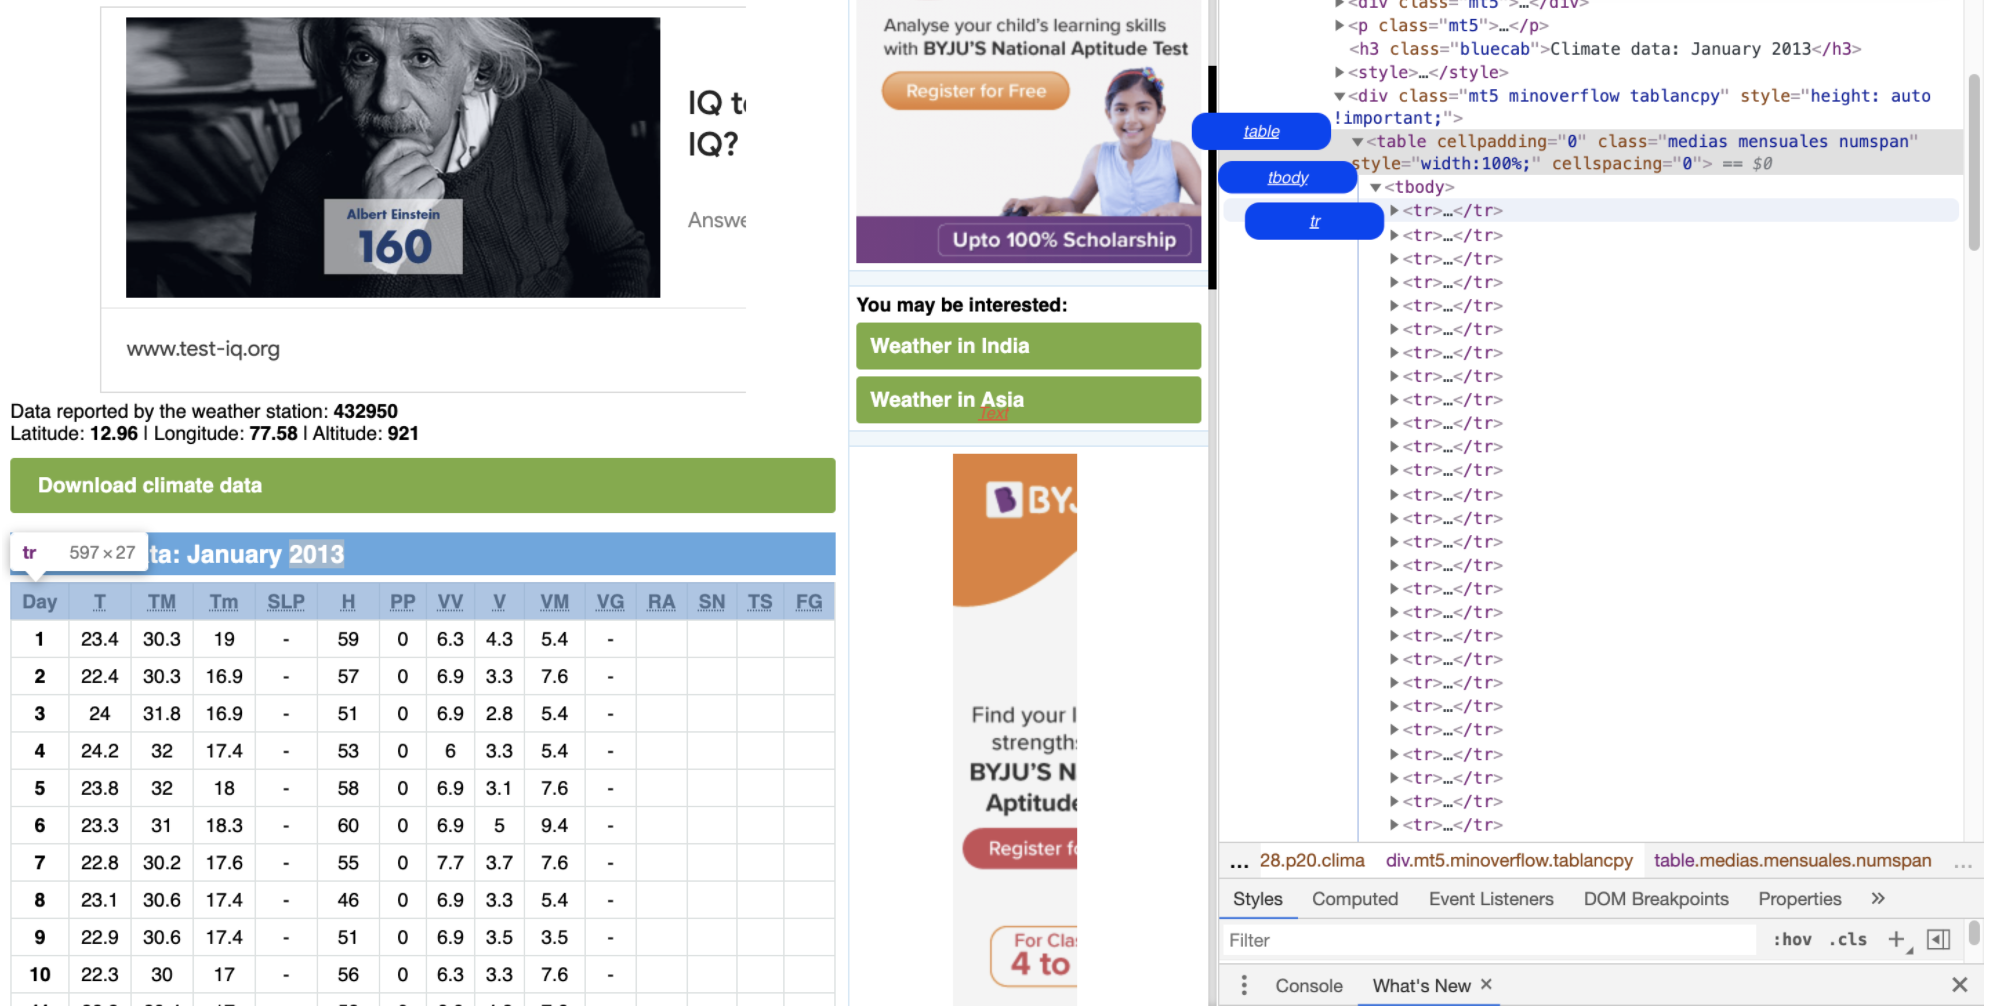

#### Try to map the below for loop, where you have "table" tag at first level and then "tbody" and then "tr" tag. So the final "tr" would have data inside each of the "tr" tag above.

In [31]:
def met_data(month,year):
    
    url="https://en.tutiempo.net/climate/{0}-{1}/ws-432950.html".format(month,year)
    r = requests.get(url)
    
    #file_html= open('Data/Html_Data/{}/{}.html'.format(year,month),'rb')
    plain_text=r.text.encode("utf=8")
    #plain_text = file_html.read()
    
    tempD = []
    finalD = []
    
    soup = BeautifulSoup(plain_text,"lxml")
    for table in soup.findAll("table",{"class":"medias mensuales numspan"}):
        for tbody in table:
            for tr in tbody:
                a=tr.get_text()
                tempD.append(a)
    
    #Compute the total number of rows ; since each row has 15 columns, we are diving the whole data by 15
    rows = len(tempD)/15
    
    #Now take each of the row and create a new 2D list (??)
    for times in range(round(rows)): #len(rows) = 33
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)
    
    #Now if you refer to the list of columns like COL 0 and other columns, where we don't have values can be dropped.
    
    finalD.pop(len(finalD)-1) #Pop out the last row, which is not required
    finalD.pop(0) #Pop the first row "Day"
    
    for a in range(len(finalD)):
        finalD[a].pop(14)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(4)
        finalD[a].pop(0)
        
    return finalD

In [50]:
def met_data_1(month,year):
    
    url="https://en.tutiempo.net/climate/{0}-{1}/ws-432950.html".format(month,year)
    r = requests.get(url)
    
    #file_html= open('Data/Html_Data/{}/{}.html'.format(year,month),'rb')
    plain_text=r.text.encode("utf=8")
    #plain_text = file_html.read()
    
    tempD = []
    finalD = []
    
    soup = BeautifulSoup(plain_text,"lxml")
    for table in soup.findAll("table",{"class":"medias mensuales numspan"}):
        for tbody in table:
            for tr in tbody:
                span = soup.findAll("span",{"class":""})                #if "<span>" in tr:
                #spans=soup.findAll("span")
                #print(tr)
                #for span in spans:
                    #print(span)
                a=tr.get_text()
                tempD.append(a)
    
    #Compute the total number of rows ; since each row has 15 columns, we are diving the whole data by 15
    rows = len(tempD)/15
    
    #Now take each of the row and create a new 2D list (??)
    for times in range(round(rows)): #len(rows) = 33
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)
    
    #Now if you refer to the list of columns like COL 0 and other columns, where we don't have values can be dropped.
    
    finalD.pop(len(finalD)-1) #Pop out the last row, which is not required
    finalD.pop(0) #Pop the first row "Day"
    
    for a in range(len(finalD)):
        finalD[a].pop(14)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(4)
        finalD[a].pop(0)
        
    return finalD
        
    

In [51]:
final_List = met_data_1("01","2013")
final_List

<th>Day</th>
<th><abbr class="tooltip" title="Average Temperature">T</abbr></th>
<th><abbr class="tooltip" title="Maximum temperature">TM</abbr></th>
<th><abbr class="tooltip" title="Minimum temperature">Tm</abbr></th>
<th><abbr class="tooltip" title="Atmospheric pressure at sea level">SLP</abbr></th>
<th><abbr class="tooltip" title="Average relative humidity">H</abbr></th>
<th><abbr class="tooltip" title="Total rainfall and / or snowmelt">PP</abbr></th>
<th><abbr class="tooltip" title="Average visibility">VV</abbr></th>
<th><abbr class="tooltip" title="Average wind speed">V</abbr></th>
<th><abbr class="tooltip" title="Maximum sustained wind speed">VM</abbr></th>
<th><abbr class="tooltip" title="Maximum speed of wind">VG</abbr></th>
<th><abbr class="tooltip" title="Indicate if there was rain or drizzle (In the monthly average, total days it rained)">RA</abbr></th>
<th><abbr class="tooltip" title="Snow indicator (In the monthly average, total days that snowed)">SN</abbr></th>
<th><abbr 

[['23.4', '30.3', '19', '59', '0', '6.3', '4.3', '5.4'],
 ['22.4', '30.3', '16.9', '57', '0', '6.9', '3.3', '7.6'],
 ['24', '31.8', '16.9', '51', '0', '6.9', '2.8', '5.4'],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['22.8', '30.2', '17.6', '55', '0', '7.7', '3.7', '7.6'],
 ['23.1', '30.6', '17.4', '46', '0', '6.9', '3.3', '5.4'],
 ['22.9', '30.6', '17.4', '51', '0', '6.9', '3.5', '3.5'],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['22.3', '30.1', '15.7', '43', '0', '6.9', '2.8', '5.4'],
 ['21.8', '30.6', '14.8', '41', '0', '6.9', '1.9', '5.4'],
 ['21.6', '30.6', '14.2', '43', '0', '6.9', '3.1', '7.6'],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['21.6', '29.6', '16.4', '58', '0', '6.9', '2.2', '3.5'],
 ['21.9', '29.6', '16.6', '58', '0', '6.9', '2.4', '5.4'],
 ['22.3', '29.9', '17.5', '55', '0', '6.

In [25]:
def data_combine(year,cs):
    for a in pd.read_csv('Data/Real-Data/real_' + str(year) + '.csv',chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist

In [27]:
if not os.path.exists("Data/Real-Data"):
    os.makedirs("Data/Real-Data")

for year in range(2013,2017):
    final_data=[]
    
    with open("Data/Real-Data/real_"+ str(year) + '.csv','w') as csvfile:
        wr =csv.writer(csvfile,dialect='excel')
        wr.writerow(['T','TM','Tm','SLP','H','VV','V','VM','PM 2.5'])
    
    for month in range(1,13):
        if(month < 10):
            temp = met_data("0"+str(month),str(year))
        else:
            temp = met_data(str(month),str(year))
            
        final_data = final_data + temp
    
    pm = get_avg(year)
    
    if(len(pm) == 364):
        pm.insert(364,'-')
    
    ## Now that we have got the avg data, which is a TV, we have to append as a last column, which is 8th column and that is what we are doing using list
    for i in range(len(final_data)-1):
        final_data[i].insert(8,pm[i])
    
    
    with open("Data/Real-Data/real_"+ str(year) + '.csv','a') as csvfile:
        wr = csv.writer(csvfile,dialect='excel')
        for row in final_data:
            flag=0
            for elem in row:
                if elem == "" or elem == "-":
                    flag=1
            
            if flag !=1 :
                wr.writerow(row)
                

data_2013 = data_combine(2013,600)
data_2014 = data_combine(2014,600)
data_2015 = data_combine(2015,600)
data_2016 = data_combine(2016,600)

total = data_2013 + data_2014 + data_2015 + data_2016

with open('Data/Real-Data/Real_Combine.csv','w') as csvfile:
    wr = csv.writer(csvfile,dialect='excel')
    wr.writerow(
    ['T','TM','Tm','SLP','H','VV','V','VM','PM 2.5'])
    wr.writerows(total)